# `Modelo Pre-entrenado`

---



In [ ]:
import torch
#Estas librerias son para descargar el modelo previamente entrenado
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

#Estas librerias son para extraer la imagen
from PIL import Image
import urllib.request as request

from matplotlib import pyplot as plt



In [ ]:
#Aqui descargamos el modelo y ponemo previamente entrenado como argumento
inception = models.inception_v3(pretrained=True)



Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


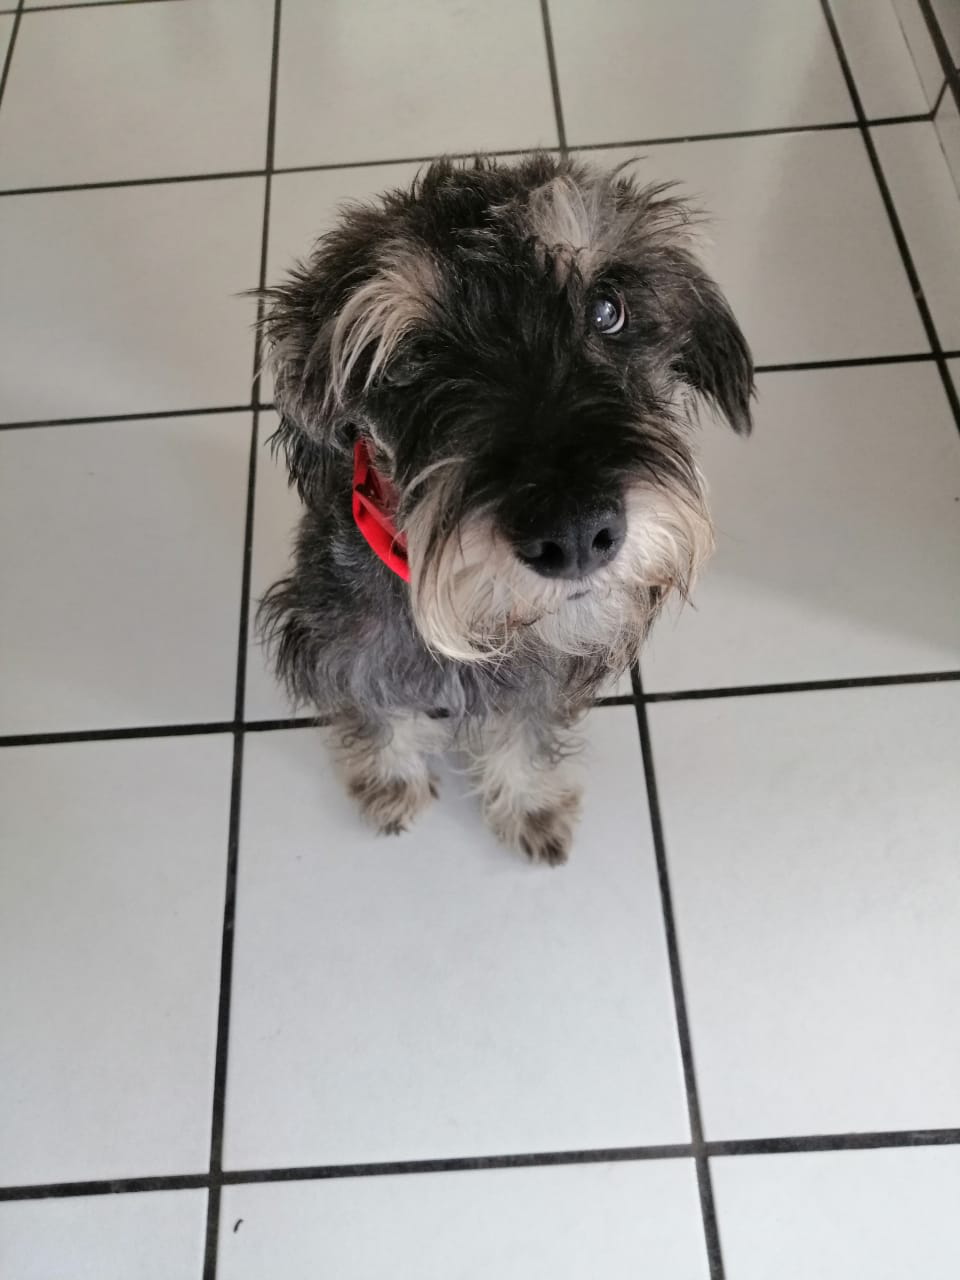

In [ ]:
# importa imagen de un perro
image = "mango.jpeg"
mango = Image.open(image)
mango

In [ ]:
url = 'https://bulldogfrances.club/wp-content/uploads/2019/07/french-bulldog.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img



HTTPError: ignored

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
     transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


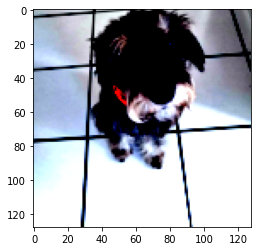

In [ ]:
img_t = preprocess(mango)
# la linea 2 es para agregar una nueva dimension con el metodo unsqueeze
batch = torch.unsqueeze(img_t, 0)
#aqui ponemos la permutacion para que las lineas queden en los ejes adecuados y se pueda ver la imagen
plt.imshow(img_t.permute(1, 2, 0))

In [ ]:
#inception es el modelo y cuando ejecutamos eval podemos ver que es lo que hay dentro del modelo
#podemos ver que hay una conv2d por que es una imagen de 2dimensiones
#es un modelo de deep learning porque tiene multiples capas
inception.eval()

NameError: ignored

In [ ]:
#es un tensor, todo lo que sale es la imagen pasada ya por la red neuronal
out = inception(batch)
out

In [ ]:
# aqui es para traer todas las etiquetas y agregarlas a una variable
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
out

In [ ]:
# aqui obtengo el maximo de una probabilidad
_, index = torch.max(out, 1)

In [ ]:
# Es para encontrar la similitud que tiene la imagen con algo
#torch.nn.functional.softmax(out, dim=1) Lo que hace es regresar un tensor el cual normaliza los valores de ‘out’ a valores entre 1 y 0. 
#De manera que el valor más pequeño en ‘out’ estará muy cercano a 0 en el tensor ‘percentage’ y el valor más grande en ‘out’ será cercano a 1 en ‘percentage’.
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100


# percentage[ index[0] ] Regresa el porcentaje de la coincidencia más alta entre etiqueta y batch y la extensión .item() lo que hace es regresar solo el valor y no un tensor.
labels[index[0]], percentage[index[0]].item()

('miniature schnauzer', 98.29988098144531)

In [ ]:
#porque torch max no regresa un unico valor, sino una tupla con dos valores.
#entonces en esa linea se estan descomponiendo los datos y descartando el primero “_” manteniendo el sengundo en la variable index
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

miniature schnauzer 98.29988098144531
Shih-Tzu 1.6999391317367554
standard schnauzer 0.00016415113350376487
Lhasa, Lhasa apso 7.501633717765799e-06
Pekinese, Pekingese, Peke 7.372769772473475e-08


# Trabajando con un dataset

---



In [ ]:
#Aqui seleccionamos la ruta donde vamos a guardar elm modelo
data_path = 'data/'
#guardamos la variable dataset con el dataset CIFAR10 le ponemos qu este entrenado = True
dataset = datasets.CIFAR10(data_path, train=True, download=True)
#guardamos la variable validacion_set con el dataset CIFAR10 le ponemos qu este entrenado = False apra despues validarlos con el otro datasete entrenado
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
#vemos la longitud de nuestro dataset para ver cuantas imagenes hay
len(dataset)

50000

In [ ]:
#Seleccionamos del dataset la imagen 50 y nos da una imagen de 32x 32
img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F07C9334D68>, 9, 'truck')

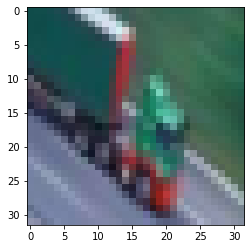

In [ ]:
plt.imshow(img)

In [ ]:
# y despues al convertimos en un tensor

tensor_transform = transforms.ToTensor()

img_tensor = tensor_transform(img)

img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F07C9334D68>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0

In [ ]:
#Para simplificar el proceso, vamos a ponerle desde un inicio que lo queremos como tensor
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [ ]:
#podemos ver que ya no nos arroja una imagen si no un conjunto de tensores porque el dataset cambio
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [ ]:
# podemos ver el minimo y el maximo tambien
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

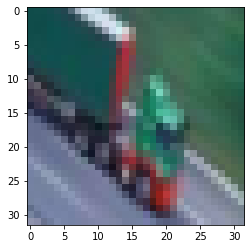

In [ ]:
#y para poder ver la imagen tenemos que ajusta bien con una permutacion donde van ubicados lso ejes
plt.imshow(img.permute(1, 2, 0))

In [ ]:
#ahora crearemos una variable para que cada iomagen la convirtamos en 3 dimensiones
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [ ]:
#y vemos el shape de 
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
#ahora obtenemos la media
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [ ]:
#y la desviacione standar
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
# para luego obtener la trasformacion y poder normalizar los datos
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])


In [ ]:
#ahora ya no queremos que lo trasforme a tensor si que queremos que lo trasforme a nuestra variabel transform
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

'frog'

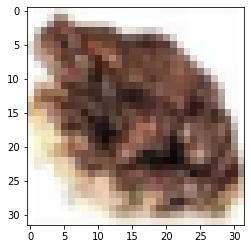

In [ ]:
img_transformed,label = dataset[125]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]